Why do we need Image Segmentation?
Cancer has long been a deadly illness. Even in today’s age of technological advancements, cancer can be fatal if we don’t identify it at an early stage. Detecting cancerous cell(s) as quickly as possible can potentially save millions of lives.

The shape of the cancerous cells plays a vital role in determining the severity of the cancer. You might have put the pieces together – object detection will not be very useful here. We will only generate bounding boxes which will not help us in identifying the shape of the cells.

Image Segmentation techniques make a MASSIVE impact here. They help us approach this problem in a more granular manner and get more meaningful results. A win-win for everyone in the healthcare industry

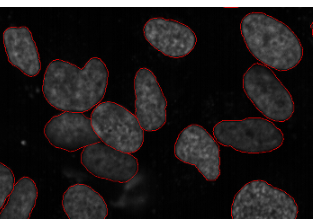

The Different Types of Image Segmentation

Let me quickly summarize what we’ve learned. If there are 5 people in an image, semantic segmentation will focus on classifying all the people as a single instance. Instance segmentation, on the other hand. will identify each of these people individually.
So far, we have delved into the theoretical concepts of image processing and segmentation. Let’s mix things up a bit – we’ll combine learning concepts with implementing them in Python. I strongly believe that’s the best way to learn and remember any topic.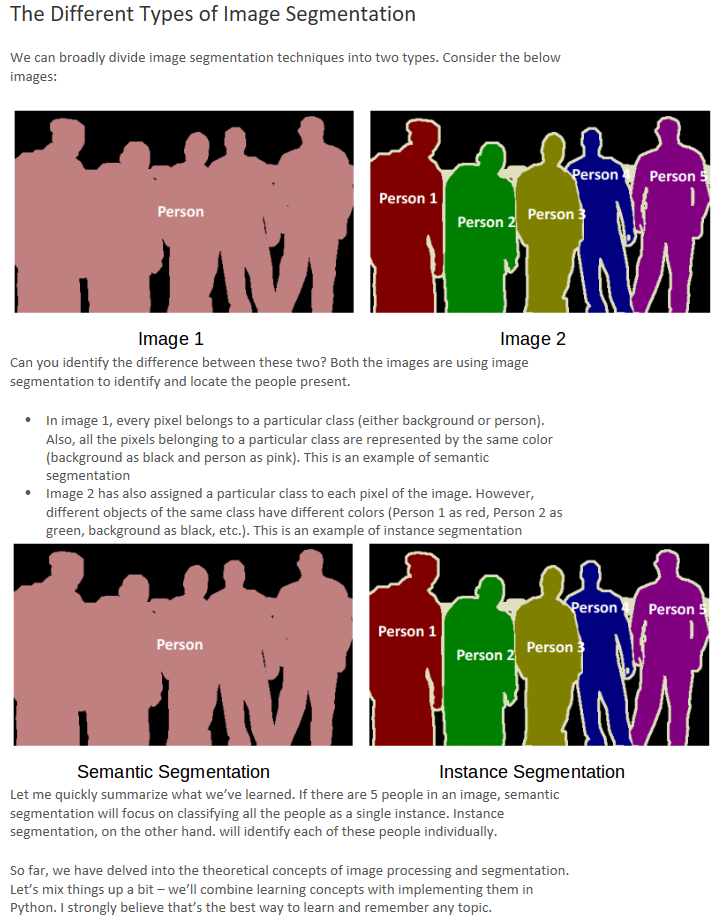

In [1]:
from skimage.color import rgb2gray
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import ndimage

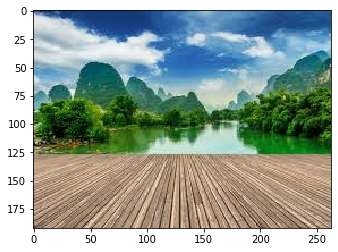

In [2]:
image = plt.imread('1.jpeg')
image.shape
plt.imshow(image)

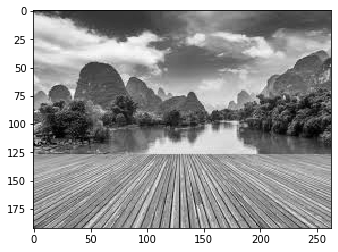

In [4]:
gray = rgb2gray(image)
plt.imshow(gray, cmap='gray')

In [5]:
gray.shape

(192, 263)

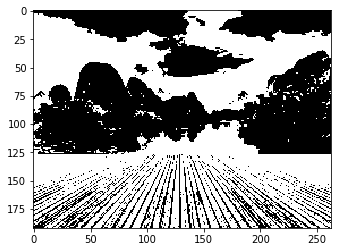

In [6]:
gray_r = gray.reshape(gray.shape[0]*gray.shape[1])
for i in range(gray_r.shape[0]):
    if gray_r[i] > gray_r.mean():
        gray_r[i] = 1
    else:
        gray_r[i] = 0
gray = gray_r.reshape(gray.shape[0],gray.shape[1])
plt.imshow(gray, cmap='gray')

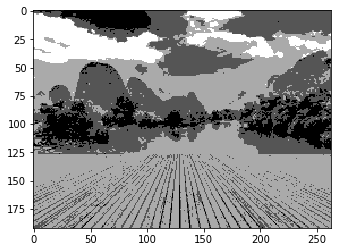

In [7]:
gray = rgb2gray(image)
gray_r = gray.reshape(gray.shape[0]*gray.shape[1])
for i in range(gray_r.shape[0]):
    if gray_r[i] > gray_r.mean():
        gray_r[i] = 3
    elif gray_r[i] > 0.5:
        gray_r[i] = 2
    elif gray_r[i] > 0.25:
        gray_r[i] = 1
    else:
        gray_r[i] = 0
gray = gray_r.reshape(gray.shape[0],gray.shape[1])
plt.imshow(gray, cmap='gray')

Edge Detection Segmentation
What divides two objects in an image? There is always an edge between two adjacent regions with different grayscale values (pixel values). The edges can be considered as the discontinuous local features of an image.

We can make use of this discontinuity to detect edges and hence define a boundary of the object. This helps us in detecting the shapes of multiple objects present in a given image. Now the question is how can we detect these edges? This is where we can make use of filters and convolutions. Refer to this article if you need to learn about these concepts.

The below visual will help you understand how a filter colvolves over an image :


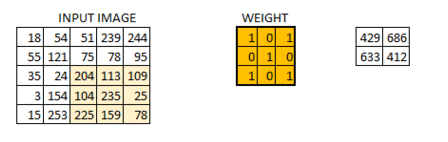

Edge detection works by convolving these filters over the given image. 

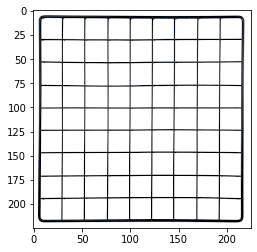

In [8]:
image = plt.imread('index.png')
plt.imshow(image)

In [9]:
# converting to grayscale
gray = rgb2gray(image)

# defining the sobel filters
sobel_horizontal = np.array([np.array([1, 2, 1]), np.array([0, 0, 0]), np.array([-1, -2, -1])])
print(sobel_horizontal, 'is a kernel for detecting horizontal edges')
 
sobel_vertical = np.array([np.array([-1, 0, 1]), np.array([-2, 0, 2]), np.array([-1, 0, 1])])
print(sobel_vertical, 'is a kernel for detecting vertical edges')

[[ 1  2  1]
 [ 0  0  0]
 [-1 -2 -1]] is a kernel for detecting horizontal edges
[[-1  0  1]
 [-2  0  2]
 [-1  0  1]] is a kernel for detecting vertical edges


In [10]:
out_h = ndimage.convolve(gray, sobel_horizontal, mode='reflect')
out_v = ndimage.convolve(gray, sobel_vertical, mode='reflect')
# here mode determines how the input array is extended when the filter overlaps a border.

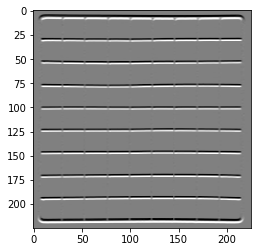

In [11]:
plt.imshow(out_h, cmap='gray')

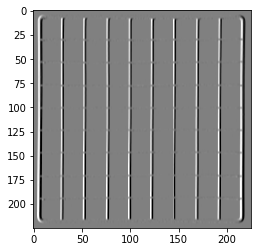

In [12]:
plt.imshow(out_v, cmap='gray')

In [ ]:
There is one more type of filter that can detect both horizontal and vertical edges at the same time. This is called the laplace operator:

1	1	1
1	-8	1
1	1	1

In [13]:

kernel_laplace = np.array([np.array([1, 1, 1]), np.array([1, -8, 1]), np.array([1, 1, 1])])
print(kernel_laplace, 'is a laplacian kernel')

[[ 1  1  1]
 [ 1 -8  1]
 [ 1  1  1]] is a laplacian kernel


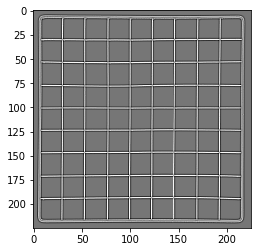

In [14]:
out_l = ndimage.convolve(gray, kernel_laplace, mode='reflect')
plt.imshow(out_l, cmap='gray')

Image Segmentation based on Clustering
This idea might have come to you while reading about image segmentation. Can’t we use clustering techniques to divide images into segments? We certainly can!

In this section, we’ll get an an intuition of what clustering is (it’s always good to revise certain concepts!) and how we can use of it to segment images.

Clustering is the task of dividing the population (data points) into a number of groups, such that data points in the same groups are more similar to other data points in that same group than those in other groups. These groups are known as clusters.

One of the most commonly used clustering algorithms is k-means. Here, the k represents the number of clusters (not to be confused with k-nearest neighbor). Let’s understand how k-means works:

First, randomly select k initial clusters
Randomly assign each data point to any one of the k clusters
Calculate the centers of these clusters
Calculate the distance of all the points from the center of each cluster
Depending on this distance, the points are reassigned to the nearest cluster
Calculate the center of the newly formed clusters
Finally, repeat steps (4), (5) and (6) until either the center of the clusters does not change or we reach the set number of iterations
The key advantage of using k-means algorithm is that it is simple and easy to understand. We are assigning the points to the clusters which are closest to them.

Let’s put our learning to the test and check how well k-means segments the objects in an image. We will be using this image, so download it, read it and and check its dimensions:

(192, 263, 3)


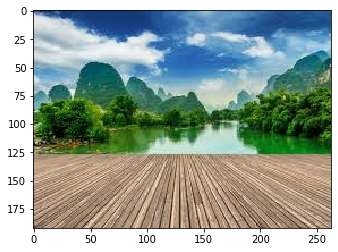

In [15]:
pic = plt.imread('1.jpeg')/255  # dividing by 255 to bring the pixel values between 0 and 1
print(pic.shape)
plt.imshow(pic)

It’s a 3-dimensional image of shape (192, 263, 3). For clustering the image using k-means, we first need to convert it into a 2-dimensional array whose shape will be (length*width, channels). In our example, this will be (192*263, 3).

In [16]:
pic_n = pic.reshape(pic.shape[0]*pic.shape[1], pic.shape[2])
pic_n.shape

(50496, 3)

In [17]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=0).fit(pic_n)
pic2show = kmeans.cluster_centers_[kmeans.labels_]

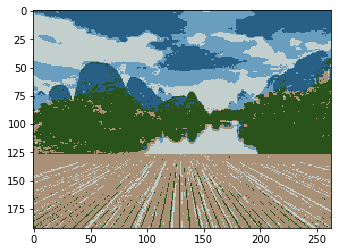

In [18]:
cluster_pic = pic2show.reshape(pic.shape[0], pic.shape[1], pic.shape[2])
plt.imshow(cluster_pic)

Amazing, isn’t it? We are able to segment the image pretty well using just 5 clusters. I’m sure you’ll be able to improve the segmentation by increasing the number of clusters.

k-means works really well when we have a small dataset. It can segment the objects in the image and give impressive results. But the algorithm hits a roadblock when applied on a large dataset (more number of images)

Mask R-CNN
Data scientists and researchers at Facebook AI Research (FAIR) pioneered a deep learning architecture, called Mask R-CNN, that can create a pixel-wise mask for each object in an image. This is a really cool concept so follow along closely!

Mask R-CNN is an extension of the popular Faster R-CNN object detection architecture. Mask R-CNN adds a branch to the already existing Faster R-CNN outputs. The Faster R-CNN method generates two things for each object in the image:

Its class
The bounding box coordinates
Mask R-CNN adds a third branch to this which outputs the object mask as well. Take a look at the below image to get an intuition of how Mask R-CNN works on the inside:

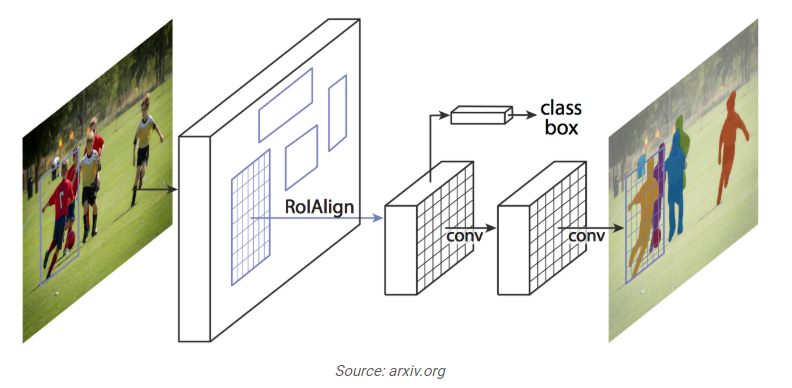Mask R-CNNSource: arxiv.org

We take an image as input and pass it to the ConvNet, which returns the feature map for that image
Region proposal network (RPN) is applied on these feature maps. This returns the object proposals along with their objectness score
A RoI pooling layer is applied on these proposals to bring down all the proposals to the same size
Finally, the proposals are passed to a fully connected layer to classify and output the bounding boxes for objects. It also returns the mask for each proposal

Summary of Image Segmentation Techniques
I have summarized the different image segmentation algorithms in the below table.. I suggest keeping this handy next time you’re working on an image segmentation challenge or problem!


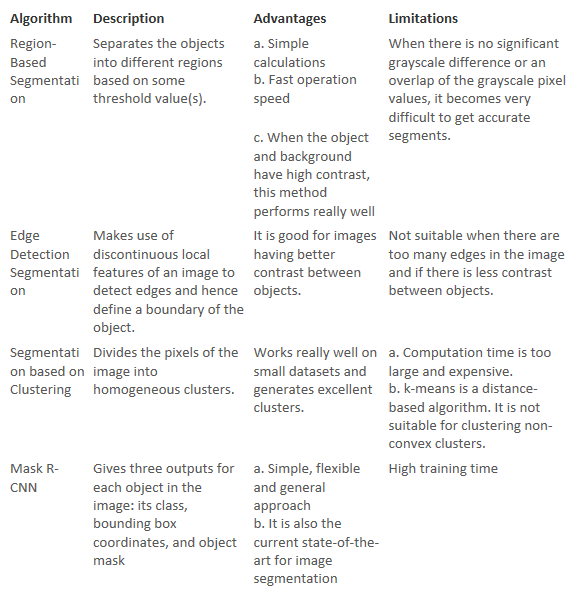